In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

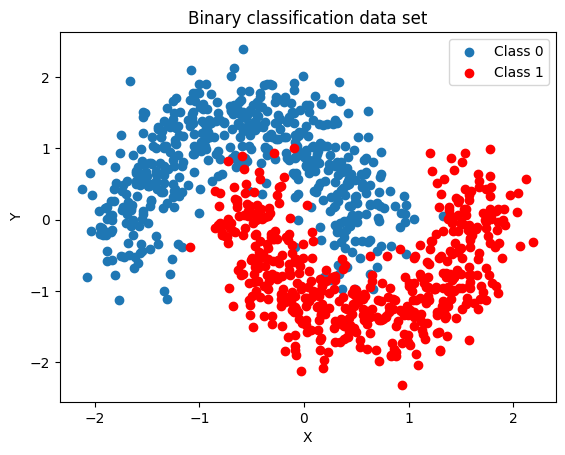

In [44]:
import matplotlib.pyplot as plt
x,y=make_moons(n_samples=1000,random_state=0,noise=0.2)
x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
fig,ax=plt.subplots()
ax.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
ax.scatter(x[y==1, 0], x[y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Binary classification data set');

# **2-LAYERED NEURAL NETWORK**

In [69]:
model=Sequential()
# model.add(Dense(1,activation='sigmoid'))
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam'
             ,loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [70]:
import keras.callbacks
tb_callback=keras.callbacks.TensorBoard(log_dir='./Graph/model_1'
                            ,histogram_freq=True
                           ,write_graph=True
                            ,write_images=False)
model.fit(x_train, y_train, batch_size=32, epochs=200,
          verbose=0, validation_data=(x_test, y_test),callbacks=[tb_callback])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12194349616765976
Test accuracy: 0.9520000219345093


In [73]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict(grid_2d, batch_size=32, verbose=0)

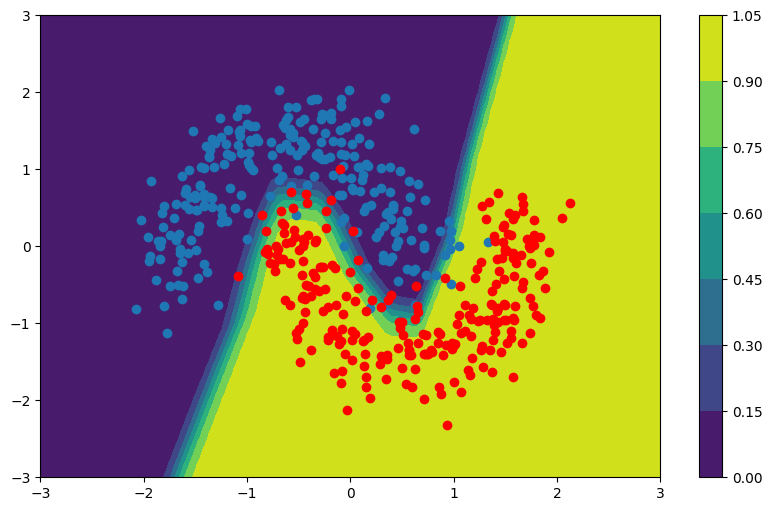

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

# **LOGISTIC REGRESSION**

In [135]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(x_train, y_train)
# print(x_train)
# print(y_train)

LogisticRegression(max_iter=200)

In [136]:
y_pred = classifier.predict(x_test)
# print(y_pred)
# print(y_test)

In [137]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[216,  32],
       [ 41, 211]])

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.854

In [113]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
Y_pred=classifier.predict(grid_2d)
# print(Y_pred)
# prediction_probs = model.predict(grid_2d, batch_size=32, verbose=0)

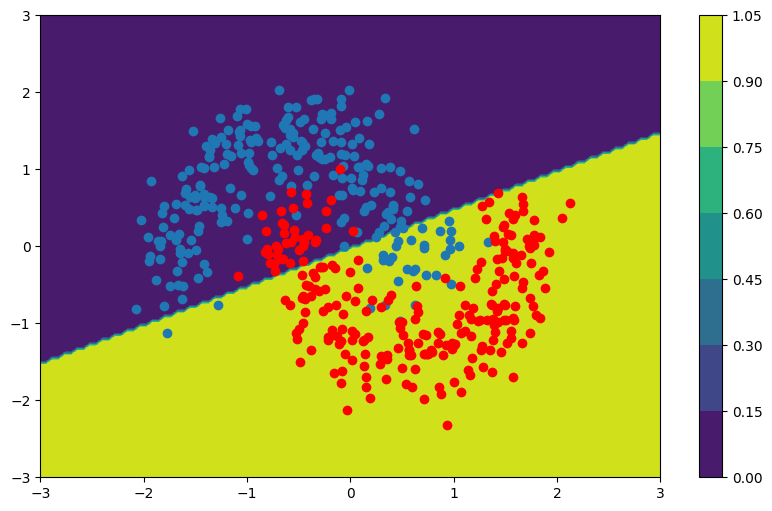

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, Y_pred.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

# **XGBoost**

In [132]:
from xgboost import XGBClassifier
# model = XGBClassifier(objective='binary:logistic')
model = XGBClassifier(n_estimators=200,objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
y_pred = model.predict(x_test)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

In [130]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
Y_pred=model.predict(grid_2d)

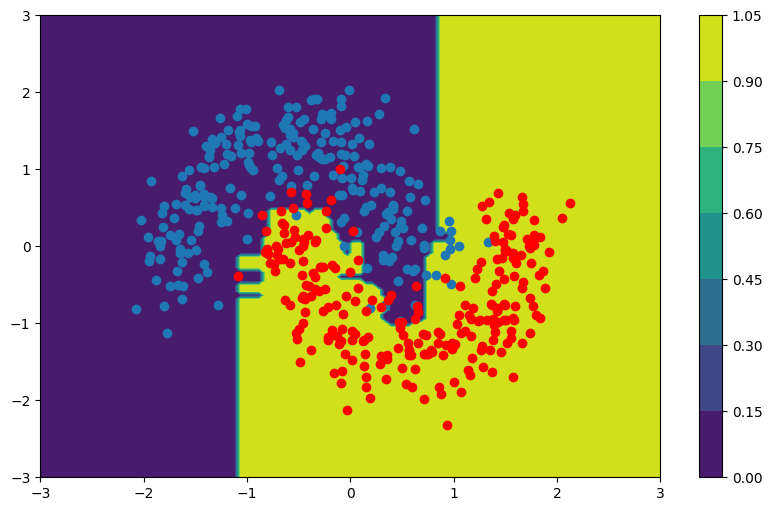

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, Y_pred.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

# **Observations**
NN accuracy - 95%
XGBoost Classifier  accuracy - 94%
logistic regression - 85.4%
I have set the no of iterations to be the same for all three models
NN gives a continuous decision boundary  
XGBoost has a binary decision boundary
They have higher accuracy   
Logistic regression has a linear decision boundary - it cannot sepearte this toy dataset because of the moon shape, the linear decision boundary is also visible in the plot
NN with two hidden layers (32 and 16) with a adadelta adaptive learning gives an accuracy of 64% But the same NN architecture with ADAM gives an accuracy of 95 percent

